# 02_preprocessing - Data Cleaning and Preprocessing

This notebook demonstrates simple preprocessing steps using `src/preprocessing.py`. Each step is in its own cell for clarity.

In [21]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import pandas as pd
from IPython.display import display

RAW_DIR = os.path.abspath(os.path.join('..', 'data', 'raw'))
CSV_LIST = [f for f in os.listdir(RAW_DIR) if f.lower().endswith('.csv')] if os.path.exists(RAW_DIR) else []
print('Found CSV files:', CSV_LIST)


Found CSV files: ['balanced_data.csv', 'cleaned_data.csv', 'SAML-D.csv', 'sample.csv']


In [22]:
# Load the balanced dataset from EDA notebook (if available), otherwise load raw dataset
balanced_path = os.path.join(RAW_DIR, 'balanced_data.csv')

if os.path.exists(balanced_path):
    # Load balanced dataset from EDA notebook
    from load_data import load_dataset
    df = pd.read_csv(balanced_path)
    print(f'✅ Loaded BALANCED dataset from: {balanced_path}')
    print(f'   Dataset size: {len(df):,} rows')
    print(f'   Class distribution:')
    print(df['Is_laundering'].value_counts())
elif not CSV_LIST:
    print('No CSV in data/raw. Please add dataset file and re-run.')
else:
    # Fallback: load original raw dataset
    dataset_path = os.path.join(RAW_DIR, CSV_LIST[0])
    from load_data import load_dataset
    df = load_dataset(dataset_path)
    print(f'⚠️  Loaded UNBALANCED raw dataset: {CSV_LIST[0]}')
    print(f'   Run 01_EDA.ipynb first to create balanced_data.csv')
    print('\nLoaded into variable `df`.')


✅ Loaded BALANCED dataset from: c:\Users\mazen\Desktop\Uni\Term 9\Data Mining\Anti-Money Laundering (AML) Detection System\aml_project\data\raw\balanced_data.csv
   Dataset size: 59,238 rows
   Class distribution:
Is_laundering
0    49365
1     9873
Name: count, dtype: int64


In [23]:
# Show first rows
try:
    display(df.head())
except NameError:
    print('`df` is not defined. Load the CSV first.')


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering
0,11:05:46,2022-10-27,4748378277,4597607403,10930.18,UK pounds,UK pounds,UK,UK,Debit card,0
1,21:31:31,2023-05-09,961567601,3014640762,1438.37,UK pounds,UK pounds,UK,UK,Debit card,0
2,12:01:02,2023-02-25,1389985052,4062285920,4947.02,UK pounds,UK pounds,UK,UK,Credit card,0
3,15:48:22,2022-10-10,8600542721,5111509251,878.24,UK pounds,UK pounds,UK,UK,Credit card,1
4,13:02:27,2023-06-11,1179006073,9411930184,8786.58,UK pounds,UK pounds,UK,UK,Credit card,0


In [24]:
# Show shape and columns
try:
    print('Shape:', df.shape)
    print('Columns:', df.columns.tolist())
except NameError:
    pass


Shape: (59238, 11)
Columns: ['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount', 'Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Is_laundering']


In [25]:
# DataFrame info
try:
    print(df.info())
except NameError:
    pass


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59238 entries, 0 to 59237
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    59238 non-null  object 
 1   Date                    59238 non-null  object 
 2   Sender_account          59238 non-null  int64  
 3   Receiver_account        59238 non-null  int64  
 4   Amount                  59238 non-null  float64
 5   Payment_currency        59238 non-null  object 
 6   Received_currency       59238 non-null  object 
 7   Sender_bank_location    59238 non-null  object 
 8   Receiver_bank_location  59238 non-null  object 
 9   Payment_type            59238 non-null  object 
 10  Is_laundering           59238 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 5.0+ MB
None


In [26]:
# Basic descriptive statistics
try:
    display(df.describe(include='all'))
except NameError:
    pass


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering
count,59238,59238,5.923800e+04,5.923800e+04,5.923800e+04,59238,59238,59238,59238,59238,59238.000000
unique,40285,321,NaN,NaN,NaN,13,13,18,18,7,NaN
top,09:03:43,2023-02-09,NaN,NaN,NaN,UK pounds,UK pounds,UK,UK,ACH,NaN
freq,7,250,NaN,NaN,NaN,56028,52502,56899,53313,11676,NaN
mean,NaN,NaN,5.038136e+09,5.009185e+09,1.390866e+04,NaN,NaN,NaN,NaN,NaN,0.166667
std,NaN,NaN,2.882089e+09,2.883052e+09,1.723923e+05,NaN,NaN,NaN,NaN,NaN,0.372681
min,NaN,NaN,9.217200e+04,9.217200e+04,5.450000e+00,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,2.567179e+09,2.509965e+09,2.268630e+03,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,5.020346e+09,5.005141e+09,6.008690e+03,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,7.535182e+09,7.510516e+09,1.036717e+04,NaN,NaN,NaN,NaN,NaN,0.000000


In [27]:
# Missing values and uniques
try:
    miss = df.isna().sum().sort_values(ascending=False)
    display(miss.head(20))
    uniques = df.nunique().sort_values()
    display(uniques.head(20))
except NameError:
    pass


Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
dtype: int64

Is_laundering                 2
Payment_type                  7
Payment_currency             13
Received_currency            13
Sender_bank_location         18
Receiver_bank_location       18
Date                        321
Sender_account            32089
Time                      40285
Receiver_account          45888
Amount                    57984
dtype: int64

In [28]:
# Drop Laundering_type column (keep only Is_laundering for binary classification)
if 'Laundering_type' in df.columns:
    df = df.drop(columns=['Laundering_type'])
    print('Dropped Laundering_type column')

# Preprocessing: run simple pipeline from src.preprocessing
from preprocessing import preprocess, save_cleaned

print('Before shape:', df.shape)
cleaned = preprocess(df, drop_thresh=0.6, date_col='Date', time_col='Time', save_path=os.path.abspath(os.path.join('..','data','processed','cleaned.csv')))
print('After shape:', cleaned.shape)


Before shape: (59238, 11)
After shape: (59238, 76)
After shape: (59238, 76)


In [29]:
# Show first rows of cleaned data
try:
    display(cleaned.head())
    print('Cleaned file saved to data/processed/cleaned.csv')
except NameError:
    print('No cleaned dataframe found. Run the preprocessing cell first.')


,Time,Date,Sender_account,Receiver_account,Amount,Is_laundering,timestamp,Payment_currency_Albanian lek,Payment_currency_Dirham,Payment_currency_Euro,...,Receiver_bank_location_UAE,Receiver_bank_location_UK,Receiver_bank_location_USA,Payment_type_ACH,Payment_type_Cash Deposit,Payment_type_Cash Withdrawal,Payment_type_Cheque,Payment_type_Credit card,Payment_type_Cross-border,Payment_type_Debit card
0,12574,20,4748378277,4597607403,10930.18,0,2022-10-27 11:05:46,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,35004,214,961567601,3014640762,1438.37,0,2023-05-09 21:31:31,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,14596,141,1389985052,4062285920,4947.02,0,2023-02-25 12:01:02,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,22840,3,8600542721,5111509251,878.24,1,2022-10-10 15:48:22,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,16813,247,1179006073,9411930184,8786.58,0,2023-06-11 13:02:27,False,False,False,...,False,True,False,False,False,False,False,True,False,False


Cleaned file saved to data/processed/cleaned.csv


Correlation matrix shape: (76, 76)


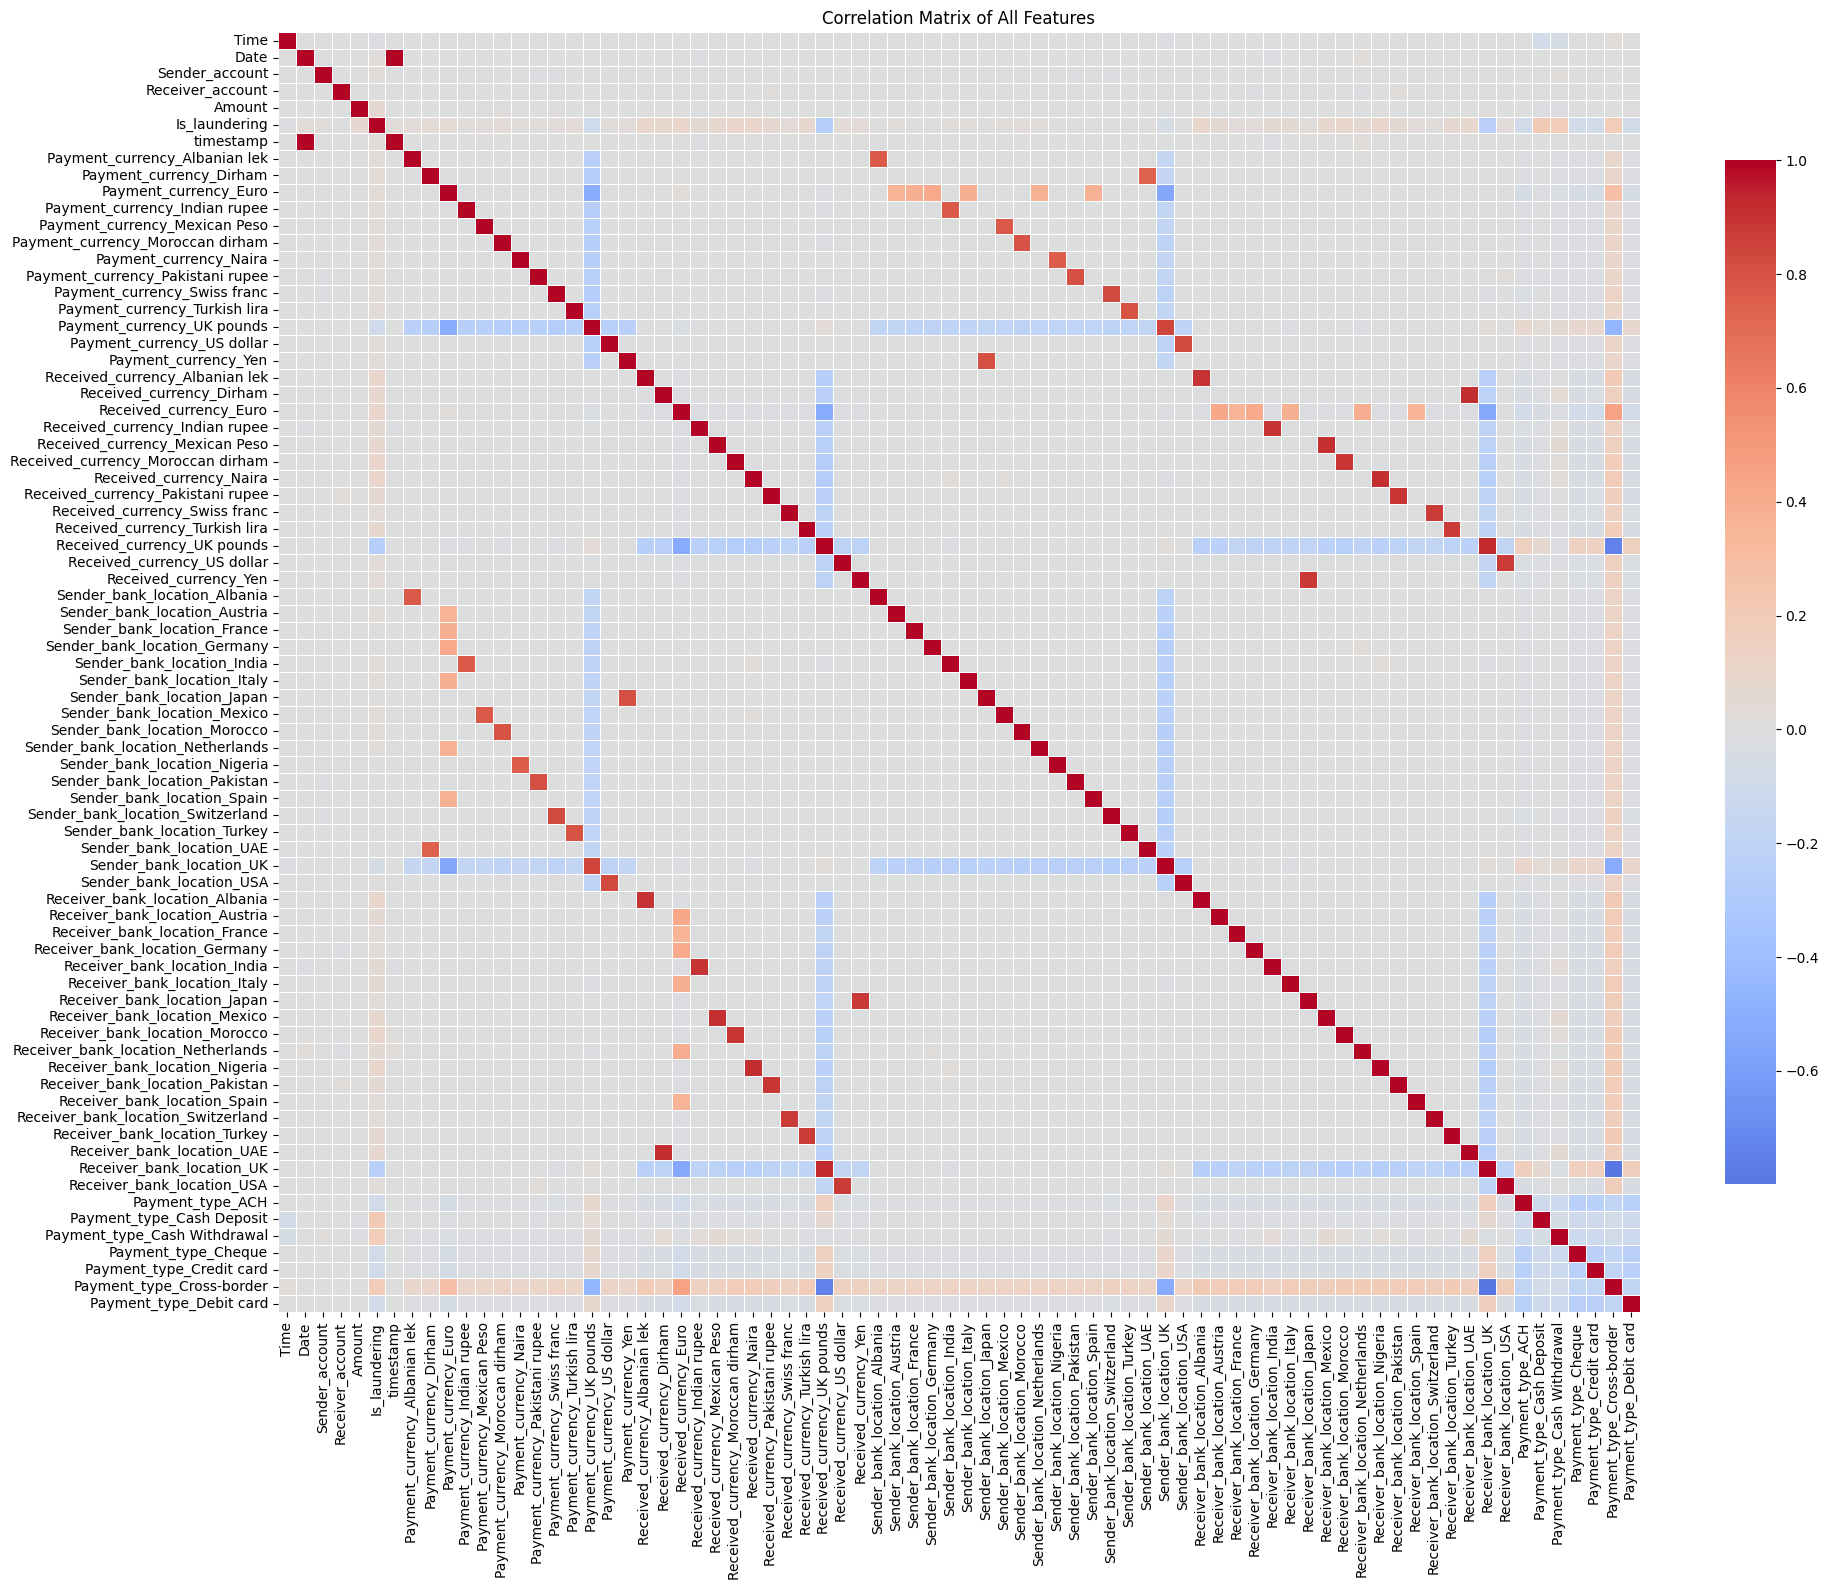

In [30]:
import seaborn as sns

# Correlation matrix for the cleaned dataframe
import matplotlib.pyplot as plt

corr_matrix = cleaned.corr()
print('Correlation matrix shape:', corr_matrix.shape)

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()